In [1]:
import pandas as pd
import spacy

In [2]:
dataset = pd.read_csv("sample.csv")

In [46]:

def classificator(string, dataset):

    nlp = spacy.load('en_core_web_sm')
    doc1 = nlp(u"Narcos")
    for index, row in dataset.iterrows():
        print ("Data:{}".format(row.values[0]))
        row_nlp = nlp(row.values[0])
        similarity = row_nlp.similarity(doc1)
        print ("Similarity:{}".format(similarity))
        for entity in row_nlp.ents:
            print(similarity)
            if float(similarity) > 1:
                print("    Entity: {} - {} - {}".format(entity.text, entity.label_,similarity))


Data:Dragon-Ball-Super-S04E28-DUBBED-720p-HDTV-x264-CRiMSON[rarbg]
Similarity:0.2638716423413313
Data:Dragon-Ball-Super-S04E13-DUBBED-720p-HDTV-x264-CRiMSON[rarbg]
Similarity:0.24462472231096813
Data:Dragon-Ball-Super-92-Eng-Sub-720p-2CH-AAC-x265-HEVC-INC[UTR]
Similarity:0.20059567383611027
Data:Dragon-Ball-Super-S04E19-DUBBED-1080p-HDTV-x264-W4F[rarbg]
Similarity:0.23081996290011902
Data:Dragon-Ball-Super-E108-1080p-WEB-DL-H264-DUAL-WWW-COMANDOTORRENTS-COM
Similarity:0.2518026682828698
0.2518026682828698
Data:Dragon-Ball-Super-S04E16-DUBBED-720p-HDTV-x264-CRiMSON[rarbg]
Similarity:0.2444498718400148
Data:Dragon-Ball-Super-S05E13-DUBBED-HDTV-x264-CRiMSON[rarbg]
Similarity:0.23733002571482575
Data:Dragon-Ball-Super-S04E26-DUBBED-720p-HDTV-x264-CRiMSON[rarbg]
Similarity:0.22214745461855737
Data:[Funimation-DUB]-Dragon-Ball-Super--83-[1080p][EXIL3]
Similarity:0.2640562016340498
Data:[ACESSE-MEGAFILMESTORRENTS-ORG]-Dragon-Ball-Super-E73-720p-WEB-DL-H264-DUAL-iZARDs
Similarity:0.21404587409

Similarity:0.31946560468646334
0.31946560468646334


In [7]:
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u"Naruto Next Generations")

for index, row in dataset.iterrows():
    row_nlp = nlp(row.values[0])
    similarity = row_nlp.similarity(doc1)
    if similarity > 0.7:
        print ("Data:{} - Similarity:{}".format(row.values[0], similarity))

Data:Boruto - Naruto Next Generations - 08 - Similarity:0.7954888256413012
Data:Boruto Naruto Next Generations E10 DUBBED HDTV x264-W4F - Similarity:0.837197512972749
Data:Boruto Naruto Next Generations - 25 - Similarity:0.8617561136656179
Data:Боруто: Новое поколение Наруто / Boruto: Naruto Next Generations [65-78] (2018) WEBRip | ColdFilm - Similarity:0.7194620516825598
Data:Боруто: Новое поколение Наруто / Boruto: Naruto Next Generations [01x01-07 из 13] (2017) WEBRip 720p | ViruseProject - Similarity:0.7274975666805215
Data:Boruto - Naruto Next Generations S01E13 [720p] [LEG] - COMANDOTORRENTS COM - Similarity:0.7220854329978869
Data:Боруто: Новое поколение Наруто / Boruto: Naruto Next Generations [01-04 из 13] (2017) HDTVRip 720p | SEKAI PROJECT - Similarity:0.7336552770111249
Data:Боруто: Новое поколение Наруто / Boruto: Naruto Next Generations [01-20 из 26] (2017) HDTVRip 720p | Shiza Project & KANSAI Studio - Similarity:0.7549031808492261
Data:Боруто: Новое поколение Наруто / B

In [37]:
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u"Narcos Mexico")


similarity_ = []
values = []

for index, row in dataset.iterrows():
    row_nlp = nlp(row.values[0])
    similarity = row_nlp.similarity(doc1)
    print ("{} Expected:{} - Predicted:{}".format(row.values[0][:16], row.values[1], similarity))
    similarity_.append(similarity*3)
    values.append(row.values[1])



Dragon-Ball-Supe Expected:1 - Predicted:0.35956778020907215
Dragon-Ball-Supe Expected:1 - Predicted:0.36613673584127354
Dragon-Ball-Supe Expected:2 - Predicted:0.3255907234868054
Dragon-Ball-Supe Expected:1 - Predicted:0.3176832117645183
Dragon-Ball-Supe Expected:2 - Predicted:0.3757766436976939
Dragon-Ball-Supe Expected:1 - Predicted:0.39584950265042107
Dragon-Ball-Supe Expected:1 - Predicted:0.3715540354383758
Dragon-Ball-Supe Expected:1 - Predicted:0.3773204166151209
[Funimation-DUB] Expected:2 - Predicted:0.4691591705651836
[ACESSE-MEGAFILM Expected:2 - Predicted:0.32228216010002547
WWW-BLUDV-TV -Dr Expected:2 - Predicted:0.24400683223676514
Dragon-Ball-Supe Expected:1 - Predicted:0.452967575059139
Dragon-Ball-Supe Expected:1 - Predicted:0.4853667999121713
[HorribleSubs] B Expected:2 - Predicted:0.5556443753831516
Boruto - Naruto  Expected:2 - Predicted:0.638300928362744
[HorribleSubs] B Expected:2 - Predicted:0.5715355018908332
Boruto - 072 [Je Expected:2 - Predicted:0.46617677522

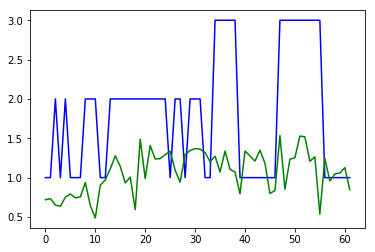

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(values, 'b')
plt.plot(similarity_, 'g')

plt.show()


In [17]:
#!/usr/bin/env python
# coding: utf8
"""Train a convolutional neural network text classifier on the
IMDB dataset, using the TextCategorizer component. The dataset will be loaded
automatically via Thinc's built-in dataset loader. The model is added to
spacy.pipeline, and predictions are available via `doc.cats`. For more details,
see the documentation:
* Training: https://spacy.io/usage/training

Compatible with: spaCy v2.0.0+
"""
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import thinc.extra.datasets

import spacy
from spacy.util import minibatch, compounding


@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_texts=("Number of texts to train from", "option", "t", int),
    n_iter=("Number of training iterations", "option", "n", int))
def main(model=None, output_dir=None, n_iter=20, n_texts=2000):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()

    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")

    # add the text classifier to the pipeline if it doesn't exist
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'textcat' not in nlp.pipe_names:
        textcat = nlp.create_pipe('textcat')
        nlp.add_pipe(textcat, last=True)
    # otherwise, get it, so we can add labels to it
    else:
        textcat = nlp.get_pipe('textcat')

    # add label to text classifier
    textcat.add_label('POSITIVE')

    # load the IMDB dataset
    print("Loading IMDB data...")
    (train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
    print("Using {} examples ({} training, {} evaluation)"
          .format(n_texts, len(train_texts), len(dev_texts)))
    train_data = list(zip(train_texts,
                          [{'cats': cats} for cats in train_cats]))

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
    with nlp.disable_pipes(*other_pipes):  # only train textcat
        optimizer = nlp.begin_training()
        print("Training the model...")
        print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
        for i in range(n_iter):
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(train_data, size=compounding(4., 32., 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                           losses=losses)
            with textcat.model.use_params(optimizer.averages):
                # evaluate on the dev data split off in load_data()
                scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
            print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  # print a simple table
                  .format(losses['textcat'], scores['textcat_p'],
                          scores['textcat_r'], scores['textcat_f']))

    # test the trained model
    test_text = "This movie sucked"
    doc = nlp(test_text)
    print(test_text, doc.cats)

    if output_dir is not None:
        with nlp.use_params(optimizer.averages):
            nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        doc2 = nlp2(test_text)
        print(test_text, doc2.cats)


def load_data(limit=0, split=0.8):
    """Load data from the IMDB dataset."""
    # Partition off part of the train data for evaluation
    train_data, _ = thinc.extra.datasets.imdb()
    random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])


def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0   # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0   # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}


if __name__ == '__main__':
    main()

Created blank 'en' model
Loading IMDB data...
 3948544/84125825 [>.............................] - ETA: 104s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-4f498abeec6f>", line 136, in <module>
    main()
  File "<ipython-input-17-4f498abeec6f>", line 54, in main
    (train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
  File "<ipython-input-17-4f498abeec6f>", line 101, in load_data
    train_data, _ = thinc.extra.datasets.imdb()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/thinc/extra/datasets.py", line 80, in imdb
    loc = get_file('aclImdb', IMDB_URL, untar=True, unzip=True)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/thinc/extra/_vendorized/keras_data_utils.py", line 104, in get_file
    urlretrieve(origin, fpath, dl_progress)
  File "/Library/Frameworks/Python.framework/Vers

KeyboardInterrupt: 